In [2]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Data Pre-processing and Feature Preparation

In [3]:
# Import dataset
data_orig = pd.read_csv('Project_Data_EE4C12_SET_PV.csv')
data_orig

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Fault_Type
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,0
...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,3
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,3
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,3
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,3


In [4]:
# Dataset transformation using one-hot encoding for multi-class classification

data = data_orig.drop('Fault_Type', axis=1) # remove the ordinary encoding column
data['Healthy'] = np.where(data_orig['Fault_Type'] == 0, 1, 0)
data['Short_Circuit'] = np.where(data_orig['Fault_Type'] == 1, 1, 0)
data['Broken_Cells'] = np.where(data_orig['Fault_Type'] == 2, 1, 0)
data['Broken_Strings'] = np.where(data_orig['Fault_Type'] == 3, 1, 0)
data

,Irradiance,Ambient_Temperature,Sun_Azimuth,Sun_Elevation,System_Power,System_Age,System_Status,Healthy,Short_Circuit,Broken_Cells,Broken_Strings
0,713,3.8,-71.3,19.8,5000.000000,0.073277,0,1,0,0,0
1,152,2.7,-28.2,11.7,1290.467722,3.731482,0,1,0,0,0
2,75,4.5,-49.6,23.1,366.571466,0.236534,0,1,0,0,0
3,379,17.7,-46.3,45.3,2261.488687,1.720781,0,1,0,0,0
4,453,14.2,-107.2,15.9,2616.082381,0.674352,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,62,10.2,-17.2,13.3,118.293683,13.476348,1,0,0,0,1
11996,114,14.8,-17.4,33.2,253.335320,4.542954,1,0,0,0,1
11997,144,6.1,41.2,6.4,526.328072,14.553955,1,0,0,0,1
11998,486,9.6,56.1,14.8,1707.208551,6.610661,1,0,0,0,1


In [5]:
print('Dataset dimention: ', data.shape)
if data.isnull().values.any():
    print('Some values are missing')
else:
    print('Noo missing values')

Dataset dimention:  (12000, 11)
Noo missing values


In [6]:
# Training-testing sets split: from now on the testing set must not be part of any operation, in order to prevent data leak

training_set, testing_set = train_test_split(data, test_size=0.15, random_state=4720)

X_training = training_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
X_testing = testing_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_training = training_set['System_Status']
y_mc_training = training_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

X_test = testing_set[['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth', 'Sun_Elevation', 
                              'System_Power', 'System_Age']]
y_2c_test = testing_set['System_Status']
y_mc_test = testing_set[['Healthy', 'Short_Circuit', 'Broken_Cells', 'Broken_Strings']]

In [7]:
#training_set

In [56]:
#testing_set

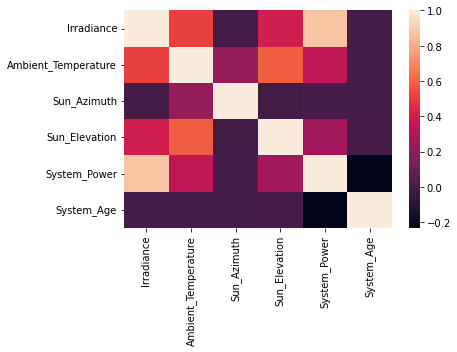

In [8]:
# Correlation matrix
corr_matrix = X_training.corr()
sn.heatmap(corr_matrix)
plt.show()

In [9]:
# Scaling of the features

scaler = StandardScaler()
scaler.fit(X_training)
X_training_scaled = scaler.transform(X_training)

In [28]:
y_1d=data_orig.iloc[:,7]

if i keep the same random state it will be the same split of the one-hot encoded y

In [29]:
y_1d_train, y_1d_test = train_test_split(y_1d, test_size=0.15, random_state=4720)

# Multi Classification Model 1

In [30]:
X_train, X_val, y_train_mc, y_val_mc = train_test_split(X_training_scaled, y_1d_train, test_size=0.15, random_state=4720)
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=3)
pol.fit(X_train)
X_train_pol = pol.transform(X_train)
X_val_pol = pol.transform(X_val)
lr = LogisticRegression(multi_class='multinomial',max_iter=1000)
y_pred = lr.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))
lr_pol = LogisticRegression(multi_class='multinomial',max_iter=1000)
y_pred_pol = lr_pol.fit(X_train_pol, y_train_mc).predict(X_val_pol)
print("Accuracy pol:", accuracy_score(y_val_mc, y_pred_pol))

Accuracy: 0.6215686274509804
Accuracy pol: 0.7503267973856209


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
plot_confusion_matrix(lr,X_val,y_val_mc)
plot_confusion_matrix(lr,X_val_pol,y_val_mc)

In [31]:
rfc = RandomForestClassifier(n_estimators=90)
y_pred = rfc.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))   #meglio linear

Accuracy: 0.7169934640522876


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


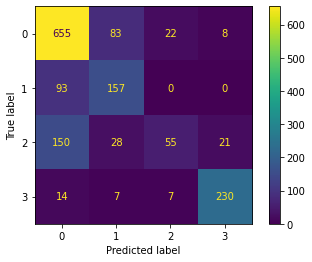

In [32]:
plot_confusion_matrix(rfc,X_val,y_val_mc)

In [69]:
C_list=[750,800,850]
for i in C_list:
    clf_svmgauss = svm.SVC(kernel='rbf',C=i).fit(X_train, y_train_mc)
    y_prediction_svmguass = clf_svmgauss.predict(X_val)
    Accuracy_svmG = accuracy_score(y_val_mc,y_prediction_svmguass)
    print("Accuracy with linear features: " + str(Accuracy_svmG))

Accuracy with linear features: 0.7810457516339869
Accuracy with linear features: 0.7830065359477124
Accuracy with linear features: 0.7823529411764706


In [68]:
C_list=[700,800,900]
for i in C_list:
    clf_svmgauss = svm.SVC(kernel='rbf',C=i).fit(X_train_pol, y_train_mc)
    y_prediction_svmguass = clf_svmgauss.predict(X_val_pol)
    Accuracy_svmG = accuracy_score(y_val_mc,y_prediction_svmguass)
    print("Accuracy with polynomial features: " + str(Accuracy_svmG))

Accuracy with polynomial features: 0.7601307189542483
Accuracy with polynomial features: 0.7633986928104575
Accuracy with polynomial features: 0.7640522875816993


heavy

In [ ]:
bag = BaggingClassifier(base_estimator=svm.SVC(kernel='rbf',C=800, coef0=0.0, tol=1e-3),n_estimators=10, random_state=0)
y_pred = bag.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy:", accuracy_score(y_val_mc, y_pred))

In [ ]:
plot_confusion_matrix(bag,X_val,y_val_mc)

# Grafico NN

In [54]:
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers


'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

# Multi Classification Model 2

da togliere

In [67]:
from sklearn.neural_network import MLPClassifier

FF_NN = MLPClassifier(hidden_layer_sizes=(X_train_pol.shape[1], 3), activation='relu', solver='adam', max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, early_stopping=False, validation_fraction=0.1)
y_pred = FF_NN.fit(X_train_pol, y_train_mc).predict(X_val_pol)
print("Accuracy with polynomial features:", accuracy_score(y_val_mc, y_pred))

FF_NN = MLPClassifier(hidden_layer_sizes=(X_train.shape[1], 5), activation='relu', solver='adam', max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, early_stopping=False, validation_fraction=0.1)
y_pred = FF_NN.fit(X_train, y_train_mc).predict(X_val)
print("Accuracy with linear features:", accuracy_score(y_val_mc, y_pred))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy with polynomial features: 0.7888888888888889
Accuracy with linear features: 0.696078431372549


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dropout

In [46]:
# Function to build the network with Keras

def buildNetwork(layers, nodes, regularization=0.0, dropout_factor=0.0):
    input_nodes = 6
    output_nodes = 4
    model = Sequential()
    if (dropout_factor > 0.0 and dropout_factor < 1.0):
            model.add(Dropout(dropout_factor, input_shape=(input_nodes,)))
    model.add(Dense(nodes[0], input_dim=input_nodes, activation='relu')) # add the first layer: from input layer to first layer
    for i in range(1, layers):
        if (dropout_factor > 0.0 and dropout_factor < 1.0):
            model.add(Dropout(dropout_factor, input_shape=(nodes[i-1],)))
        model.add(Dense(nodes[i], activation='relu', kernel_regularizer=regularizers.l2(regularization)))
    model.add(Dense(output_nodes, activation='sigmoid')) # Important: dropout is not used on the output layer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # training the network
    return model

In [47]:
layers=3
nodes=[6,6,5]
model=buildNetwork(layers,nodes)

In [48]:
y_train_mc, y_val_mc = train_test_split(y_mc_training, test_size=0.15, random_state=4720)

In [79]:
history = model.fit(X_train, y_train_mc, epochs=800, batch_size=10)

Epoch 1/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2970 - accuracy: 0.7295
Epoch 2/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2972 - accuracy: 0.7276
Epoch 3/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2975 - accuracy: 0.7294
Epoch 4/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2973 - accuracy: 0.7306
Epoch 5/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2958 - accuracy: 0.7296
Epoch 6/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2965 - accuracy: 0.7291
Epoch 7/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2957 - accuracy: 0.7325
Epoch 8/800
867/867 [==============================] - 1s 2ms/step - loss: 0.2960 - accuracy: 0.7296
Epoch 9/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2961 - accuracy: 0.7336
Epoch 10/800
867/867 [==============================] - 2s 2ms/step - loss: 0.2960 - accura

In [80]:
# evaluate the keras model
_,accuracy = model.evaluate(X_val, y_val_mc)   
print('Accuracy: %.2f' % (accuracy*100))

48/48 [==============================] - 0s 3ms/step - loss: 0.2535 - accuracy: 0.7654
Accuracy: 76.54


In [81]:
y_mc_predict=model.predict(X_val,batch_size=10)
matrix = confusion_matrix(np.array(y_val_mc).argmax(axis=1), y_mc_predict.argmax(axis=1))
matrix

array([[680,  59,  29,   0],
       [ 74, 170,   4,   2],
       [111,  28,  94,  21],
       [  6,   9,  16, 227]], dtype=int64)

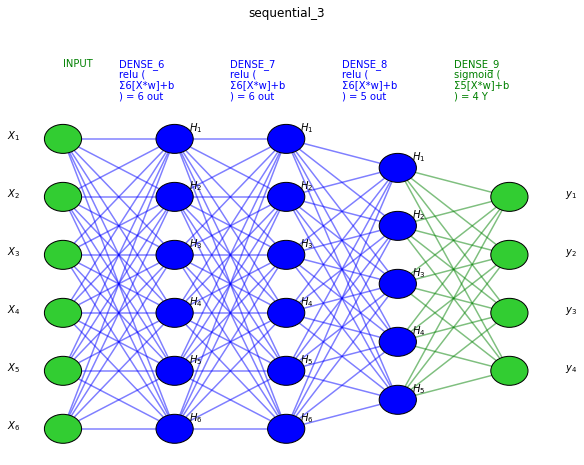

In [55]:
visualize_nn(model, description=True, figsize=(10,8))

# SHAP

inutile

In [70]:
import shap
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values, 
                            features=X_instance, feature_names=X_names, max_display=top)
i = 1
explainer_shap(model, X_names=np.array(X_training.columns), X_instance=X_val[i], 
               X_train=X_train, 
               task="classification", 
               top=10)

array(['Irradiance', 'Ambient_Temperature', 'Sun_Azimuth',
       'Sun_Elevation', 'System_Power', 'System_Age'], dtype=object)

In [86]:
explainer = shap.DeepExplainer(model,X_train)
shap_values = explainer.shap_values(X_val)

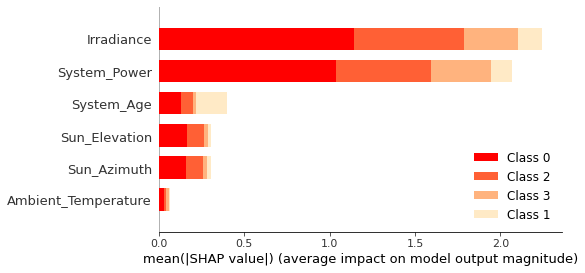

In [92]:
import matplotlib.pyplot as pl
shap.summary_plot(shap_values, X_val, plot_type="bar",feature_names=list(X_training.columns),color=pl.get_cmap("flag"))

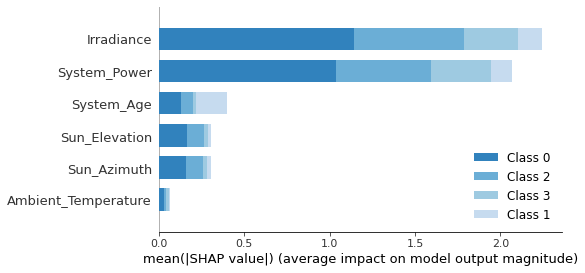

In [93]:
shap.summary_plot(shap_values, X_val, plot_type="bar",feature_names=list(X_training.columns),color=pl.get_cmap("tab20c"))

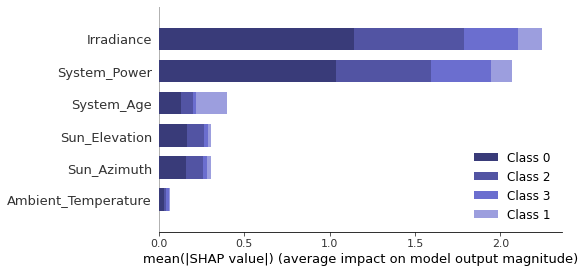

In [100]:
shap.summary_plot(shap_values, X_val, plot_type="bar",feature_names=list(X_training.columns),color=pl.get_cmap("tab20b"))

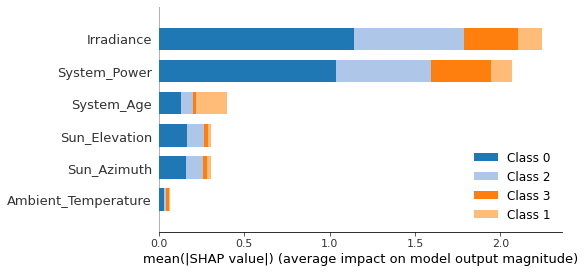

In [98]:
shap.summary_plot(shap_values, X_val, plot_type="bar",feature_names=list(X_training.columns),color=pl.get_cmap("tab20"))

# Testing

In [57]:
# Scaling of the features

scaler = StandardScaler()
scaler.fit(X_testing)
X_testing_scaled = scaler.transform(X_testing)

In [58]:
pred=model.predict(X_testing_scaled)
accuracy = accuracy_score(np.array(y_mc_test).argmax(axis=1),pred.argmax(axis=1))
print('Accuracy: %.2f' % (accuracy*100))
matrix = confusion_matrix(np.array(y_mc_test).argmax(axis=1), pred.argmax(axis=1))
matrix

Accuracy: 72.33


array([[797, 102,   9,   0],
       [114, 190,   2,   5],
       [172,  30,  54,  32],
       [  6,  10,  16, 261]], dtype=int64)